In [ ]:
%load_ext autoreload
%autoreload 2

# Mini-Course Outline: SimPy for System Dynamics

1. Introduction to Discrete-Event Simulation (DES) and System Dynamics

+ Overview of DES
+ How system dynamics fits into DES
+ Key concepts in system dynamics modeling

2. Getting Started with SimPy

+ Installation and setup
+ Basic components of SimPy (Environment, Events, Processes, Resources)

3. Building Your First SimPy Model

+ Defining system entities
+ Modeling time and processes
+ Running the simulation

4. Advanced Modeling Concepts

+ Resources and queues
+ Prioritizing events
+ Incorporating randomness and variability

5. Case Studies in System Dynamics with SimPy

+ Healthcare system modeling
+ Supply chain and logistics
+ Manufacturing processes

6. Analyzing Simulation Outputs

+ Gathering and storing simulation data
+ Visualization techniques
+ Statistical analysis for decision-making

7. Optimizing System Performance with SimPy

+ Scenario analysis
+ Sensitivity analysis
+ Optimization techniques

8. Integrating SimPy with Other Python Libraries

+ Data analysis with pandas
+ Visualization with matplotlib and seaborn
+ Machine learning for predictive modeling

## Chapter 1: Introduction to Discrete-Event Simulation (DES) and System Dynamics

### Overview of DES
Discrete-Event Simulation (DES) is a powerful modeling approach used to simulate the operation of a system as a discrete sequence of events in time. Each event occurs at a particular instant in time and marks a change of state in the system. Unlike continuous simulation, which simulates systems in which changes occur continuously over time, DES focuses on systems where changes happen at specific points in time. This makes DES particularly useful for complex systems where interactions are event-driven, such as in manufacturing processes, telecommunications networks, and service operations.

###  How System Dynamics Fits into DES
System dynamics is a methodology for understanding the behavior of complex systems over time. It deals with internal feedback loops and time delays that affect the behavior of the entire system. While DES is event-centric, focusing on discrete changes, system dynamics provides a higher-level view, focusing on the continuous flows and accumulations that drive system behavior. System dynamics models are often used for strategic decision-making and policy analysis, offering insights into how systems evolve and how they can be managed or improved.

In the context of DES, system dynamics plays a complementary role. It helps in understanding the broader implications of the events being simulated, providing a framework to analyze how individual events affect the system's state over time. For instance, in a DES model of a manufacturing process, system dynamics can help analyze how changes in production rates, inventory levels, and demand forecasts affect the overall system stability and performance.

### Key Concepts in System Dynamics Modeling

1. **Stocks and Flows**: Stocks represent accumulations of resources or quantities within the system, such as inventory in a warehouse. Flows represent the rates at which these stocks change over time, like products being manufactured or sold.

2. **Feedback Loops**: These are circular paths where a change in one part of the system eventually feeds back to affect itself, either amplifying (positive feedback) or dampening (negative feedback) the initial change. Feedback loops are crucial for understanding system behavior and resilience.

3. **Time Delays**: Time delays occur between cause and effect in a system, which can lead to oscillations or instability. Recognizing and accurately modeling these delays is important for realistic simulation outcomes.

4- **Modeling and Simulation Software**: While SimPy is a tool for DES, other software like Stella or Vensim is designed for system dynamics modeling. However, understanding the principles of system dynamics enhances the depth of analysis possible with DES by incorporating broader system behaviors into event-driven simulations.

By integrating the insights gained from system dynamics into DES models, you can create more robust and comprehensive simulations. This synergy allows for not only simulating the detailed operation of a system but also understanding the long-term implications and dynamics of the system's behavior.

As we progress, we'll delve deeper into SimPy and how it can be used to model both discrete events and, to some extent, capture the essence of system dynamics through its modeling capabilities.

## Chapter 2: Getting Started with SimPy

### Installation and Setup
Before we dive into the mechanics of SimPy, let's ensure you have SimPy installed in your Python environment. Given your proficiency in Python, I'll assume you're familiar with using pip for installing packages. If SimPy is not already installed, you can add it to your environment by running the following command in your terminal or command prompt:

```
pip install simpy
```

This command fetches the latest version of SimPy from the Python Package Index (PyPI) and installs it in your Python environment. Once the installation process is complete, you can verify that SimPy is installed correctly by trying to import it in a Python session:

In [1]:
import simpy

If this command runs without errors, you're all set to start using SimPy.

### Basic Components of SimPy
SimPy models the operation of a system using a few basic building blocks: Environment, Events, Processes, and Resources. Let's briefly go over each of these components:

1. **Environment**: The environment is the core of any SimPy simulation. It represents the timeline of your simulation and manages the simulation time. All entities, events, and processes interact within this environment. You create an environment using simpy.Environment().

2. **Events**: Events are occurrences that change the state of the system at a specific point in time. Events can be scheduled (e.g., an arrival of a new customer) or instantaneous (e.g., a machine breaking down). In SimPy, events are represented by the Event class, and they can be scheduled, processed, or triggered within the environment.

3. **Processes**: Processes model the behavior of entities within the system. They are defined by Python generator functions that yield event objects. Processes can wait for events to happen, trigger other events, or even initiate other processes. These generator functions are what make SimPy simulations dynamic and allow modeling complex behaviors and interactions.

4. **Resources**: Resources represent limited capacity facilities or entities that can be used by processes. Resources can be anything from a machine in a factory to a server in a computer network. SimPy offers various types of resources, such as Resource for basic shared resources, PriorityResource for resources with prioritized access, and Container and Store for modeling inventories and storage capabilities.

Here’s a basic example that puts together these concepts to create a simple simulation of a car charging at an electric vehicle charging station:

In [2]:
import simpy

def car(env):
    print('Start parking and charging at', env.now)
    yield env.timeout(5)  # Represents the charging process
    print('Stop parking and charging at', env.now)

env = simpy.Environment()  # Create the SimPy environment
env.process(car(env))  # Add the car process to the environment
env.run(until=15)  # Run the simulation


Start parking and charging at 0
Stop parking and charging at 5


This example demonstrates creating an environment, defining a process (the car function), and running the simulation. The env.timeout(5) call simulates the car charging for 5 units of time.

## Chapter 3: Building Your First SimPy Model
In this chapter, we will develop a more comprehensive SimPy model step by step. We'll simulate a simple queueing system, such as a single cashier in a grocery store, to demonstrate defining system entities, modeling time and processes, and running the simulation.

## Defining System Entities
In our simulation, the primary entities will be customers and a cashier. The cashier will be modeled as a resource because it has a limited capacity (in this case, one), meaning it can only serve one customer at a time. Customers will be modeled as processes because they have behavior over time, specifically arriving and being served.

## Modeling Time and Processes
We'll define two processes:

1. Customer arrivals
2. Customer service

Customers will arrive at random intervals, and each will require a random amount of service time. This randomness introduces variability into our simulation, making it more realistic.

We'll use SimPy's Environment, Resource, and Process components, along with Python's random module to introduce variability.

### Running the Simulation
The goal of our simulation will be to observe how the system behaves over time, specifically looking at how long customers have to wait to be served.

Here's the full code for our model:

In [3]:
import simpy
import random

def customer(env, name, cashier):
    # Customer arrives and requests the cashier
    print(f'{name} arrives at the cashier at {env.now:.2f}')
    with cashier.request() as request:
        yield request
        # Customer starts being served
        print(f'{name} starts being served at {env.now:.2f}')
        yield env.timeout(random.randint(1, 3))  # Random service time between 1 and 3
        # Customer leaves
        print(f'{name} leaves at {env.now:.2f}')

def setup(env, num_cashiers, interarrival_time):
    # Create the cashier resource
    cashier = simpy.Resource(env, num_cashiers)
    
    # Generate customers at random intervals
    i = 0
    while True:
        yield env.timeout(random.expovariate(1.0 / interarrival_time))
        i += 1
        env.process(customer(env, f'Customer {i}', cashier))

# Set up the environment
random.seed(42)  # For reproducible results
env = simpy.Environment()
env.process(setup(env, num_cashiers=1, interarrival_time=2))

# Run the simulation
env.run(until=20)



Customer 1 arrives at the cashier at 2.04
Customer 1 starts being served at 2.04
Customer 2 arrives at the cashier at 2.09
Customer 3 arrives at the cashier at 2.65
Customer 4 arrives at the cashier at 2.95
Customer 5 arrives at the cashier at 3.17
Customer 1 leaves at 4.04
Customer 2 starts being served at 4.04
Customer 6 arrives at the cashier at 5.87
Customer 7 arrives at the cashier at 6.05
Customer 2 leaves at 7.04
Customer 3 starts being served at 7.04
Customer 8 arrives at the cashier at 7.15
Customer 9 arrives at the cashier at 7.34
Customer 10 arrives at the cashier at 7.87
Customer 3 leaves at 8.04
Customer 4 starts being served at 8.04
Customer 11 arrives at the cashier at 9.72
Customer 12 arrives at the cashier at 10.16
Customer 4 leaves at 11.04
Customer 5 starts being served at 11.04
Customer 13 arrives at the cashier at 12.26
Customer 14 arrives at the cashier at 13.35
Customer 5 leaves at 14.04
Customer 6 starts being served at 14.04
Customer 15 arrives at the cashier a

This code simulates a single cashier and customers arriving at an average interval of 2 time units. Each customer requires a random service time between 1 and 3 time units. We run the simulation for 20 time units.

The setup function initializes the simulation environment, creating the cashier resource and generating customers at random intervals. The customer function models the customer's process of arriving, being served, and leaving.

When you run this simulation, you'll see logs indicating when each customer arrives, starts being served, and leaves. This output helps us understand how the system operates over time and the dynamics of the queueing process.

Try running the simulation with different parameters (e.g., longer simulation time, faster or slower customer arrival rate) to see how the system's behavior changes.

## Chapter 4: Advanced Modeling Concepts

After establishing a basic understanding of building and running SimPy models, let's delve into more advanced modeling concepts that can add depth and realism to your simulations. These concepts include managing resources and queues more effectively, prioritizing events, and incorporating randomness and variability into your models.

### Resources and Queues

SimPy provides several types of resources to model shared facilities or services with limited capacity, such as `Resource`, `PriorityResource`, `PreemptiveResource`, and others. Each resource type can help simulate different scenarios:

+ **Resource**: The basic resource type, useful for modeling resources that can be used by one or more entities at a time, like a set of identical servers in a data center.
+ **PriorityResource**: Extends `Resource` by allowing processes to have priorities. This is useful in scenarios where certain actions or entities should be given precedence over others, such as emergency services in healthcare.
+ **PreemptiveResource**: Further extends `PriorityResource` by allowing higher-priority processes to preempt (interrupt) lower-priority processes currently using the resource.

The management of queues (waiting lines) for these resources is an integral part of simulation modeling. SimPy automatically manages queues for each resource, but you can customize this behavior. For instance, you might want to limit queue lengths or implement custom queue disciplines.

### Prioritizing Events

SimPy allows for the prioritization of events through the `PriorityResource` and `PreemptiveResource`. This enables more sophisticated modeling of real-world systems where priorities can influence the order in which tasks are performed or resources are allocated.

To use prioritization, when creating a request for a resource, you can specify a priority level. Higher priority levels are served before lower ones. In the case of `PreemptiveResource`, you can also specify preemption parameters, allowing a higher-priority process to interrupt and displace a lower-priority process.

### Incorporating Randomness and Variability

Real-world systems are often subject to variability and randomness, making it important to include these elements in your simulations to achieve realistic and reliable results. You can introduce randomness in various ways:

+ **Interarrival times and service times**: Use random number distributions (e.g., exponential, normal, uniform) to determine how frequently entities arrive in the system or how long they require to be served.
+ **Resource availability and failures**: Model resources as having variable availability or being subject to random failures and repairs, affecting the flow and processing of entities.
+ **Entity attributes**: Assign entities with attributes that influence their behavior or processing within the system, where these attributes can vary according to defined probability distributions.

Python's `random` module or NumPy's random number generation capabilities are typically used to generate the necessary random values within SimPy models.

### Example: Enhancing Our Grocery Store Model

Let's incorporate some of these advanced concepts into our grocery store cashier model by adding a second cashier with priority for express checkout and introducing randomness in customer arrival and service times.

In [2]:
import simpy
import random

def customer(env, name, cashiers, express):
    print(f'{name} arrives at {env.now:.2f}')
    with cashiers.request(priority=express) as req:
        yield req
        print(f'{name} starts checkout at {env.now:.2f} in {"express" if express else "regular"} line')
        yield env.timeout(random.randint(1, 3))  # Random service time
        print(f'{name} leaves at {env.now:.2f}')

def setup(env):
    cashiers = simpy.PriorityResource(env, capacity=2)
    i = 0
    while True:
        yield env.timeout(random.expovariate(1/2))  # Random arrival time
        i += 1
        env.process(customer(env, f'Customer {i}', cashiers, express=random.choice([0, 1])))

env = simpy.Environment()
env.process(setup(env))
env.run(until=20)


Customer 1 arrives at 0.13
Customer 1 starts checkout at 0.13 in express line
Customer 2 arrives at 0.68
Customer 2 starts checkout at 0.68 in regular line
Customer 2 leaves at 2.68
Customer 1 leaves at 3.13
Customer 3 arrives at 4.06
Customer 3 starts checkout at 4.06 in express line
Customer 3 leaves at 5.06
Customer 4 arrives at 6.75
Customer 4 starts checkout at 6.75 in express line
Customer 5 arrives at 8.21
Customer 5 starts checkout at 8.21 in regular line
Customer 4 leaves at 8.75
Customer 6 arrives at 9.29
Customer 6 starts checkout at 9.29 in regular line
Customer 5 leaves at 10.21
Customer 6 leaves at 11.29
Customer 7 arrives at 14.08
Customer 7 starts checkout at 14.08 in express line
Customer 8 arrives at 14.24
Customer 8 starts checkout at 14.24 in express line
Customer 8 leaves at 15.24
Customer 7 leaves at 17.08


In this enhanced model, we now have two cashiers, and customers are randomly assigned as express or not, affecting their priority in the queue. Service times and customer arrivals are randomized to add variability to the simulation.

Incorporating these advanced concepts into your SimPy models will enable you to capture the complexities and uncertainties inherent in real-world systems more accurately.

## Chapter 5: Case Studies in System Dynamics with SimPy

This chapter explores how SimPy can be applied to various domains through case studies in healthcare system modeling, supply chain and logistics, and manufacturing processes. These examples illustrate the flexibility of SimPy in representing complex system dynamics and the breadth of its applicability across different fields.

### Healthcare System Modeling

**Scenario**: Modeling a Hospital Emergency Department (ED)

The goal is to understand how patient flow impacts wait times and overall capacity utilization of the ED. We can model patients arriving with different urgency levels, requiring different amounts of treatment time, and competing for limited resources such as doctors, nurses, and beds.

**Key Elements**:

+ Patients as entities with attributes for urgency and treatment time.
+ Resources include medical staff and hospital beds.
+ Process modeling for patient triage, treatment, and discharge.
+ Analyzing outcomes like patient wait times, staff utilization, and throughput.

This model can help hospital administrators understand the impact of changes in staffing, process improvements, or variations in patient arrivals on ED performance.

### Supply Chain and Logistics

**Scenario**: Modeling a Distribution Network

In this case, we simulate a distribution network consisting of suppliers, warehouses, and retail outlets. The aim is to optimize inventory levels, minimize shipping costs, and ensure timely delivery to meet customer demand.

**Key Elements**:

+ Entities include inventory items, orders, and transportation vehicles.
+ Processes for ordering, shipping, receiving, and restocking.
+ Resources such as storage capacity at warehouses and fleet capacity.
+ Metrics for evaluating performance include delivery times, inventory levels, and shipping costs.

Such a simulation can inform decisions on where to locate new warehouses, how to route shipments, and optimal inventory levels to reduce costs and improve service.

### Manufacturing Processes

**Scenario**: Optimizing a Production Line

This case study focuses on a production line manufacturing multiple products. The objective is to maximize throughput and efficiency while minimizing downtime and waste.

**Key Elements**:

+ Machines, workers, and materials as resources with varying availability and capabilities.
+ Entities represent different products, each requiring specific processes and materials.
+ Processes for assembly, quality control, and packaging.
+ Analysis of system bottlenecks, machine utilization, and production lead times.

Simulating the production line can reveal opportunities for process improvements, better resource allocation, and strategies for managing production variability.

### Implementing Case Studies with SimPy

Implementing these case studies in SimPy involves defining the entities, processes, and resources specific to each scenario and then simulating the interactions and dynamics of the system over time. The flexibility of SimPy allows for detailed modeling of complex behaviors and interactions, providing valuable insights into system performance under various conditions.

These case studies demonstrate the power of simulation in understanding and optimizing complex systems. Whether you're managing a healthcare facility, a supply chain network, or a manufacturing operation, SimPy provides a robust platform for exploring system dynamics and identifying improvements.

### Simplified version of Case Study 1: Modeling a Hospital Emergency Department (ED)

In this scenario, we'll focus on patients arriving at the ED, requiring different levels of care, and using various ED resources such as doctors and beds.

#### Simplified Hospital ED Model Overview

+ **Patients** arrive at the ED with varying conditions, requiring different amounts of treatment time.
+ **Doctors** are limited resources that patients must wait for to receive treatment.
+ **Beds** are another resource that patients may need during their stay in the ED.

#### Key Elements to Model

1. **Patient Arrivals**:
    + Patients arrive randomly, simulating the unpredictable nature of emergency department visits.
2. **Treatment Process**:
    + Varying treatment times based on the severity of the condition.
    + Some patients may require a bed for their treatment, while others can be treated in the waiting area.
3. **Resources**:
    + A limited number of doctors and beds available for treating patients.

#### SimPy Implementation

We'll set up the simulation environment, define our patient arrival process, and model the treatment process that utilizes the available doctors and beds.

In [20]:
import simpy
import random

# Parameters
NUM_DOCTORS = 3
NUM_BEDS = 5
TREATMENT_TIME_RANGE = (15, 60)  # Treatment time range in minutes
PATIENT_INTERARRIVAL_TIME = 10  # Average time between patient arrivals in minutes
SIMULATION_TIME = 4 * 60  # Simulate for 4 hours, time in minutes
BED_NEEDED_PROBABILITY = 0.5  # 50% chance a patient will need a bed

class HospitalED:
    def __init__(self, env):
        self.env = env
        self.doctor = simpy.Resource(env, NUM_DOCTORS)
        self.bed = simpy.Resource(env, NUM_BEDS)

    def treat_patient(self, patient):
        arrival_time = self.env.now
        print(f"{patient} arrived at {arrival_time}")
        
        with self.doctor.request() as doctor_req:
            yield doctor_req  # Wait for a doctor to become available
            print(f"{patient} started treatment with doctor at {env.now}")

            # Determine if the patient needs a bed
            needs_bed = random.random() < BED_NEEDED_PROBABILITY
            if needs_bed:
                with self.bed.request() as bed_req:
                    print(f"{patient} waiting for a bed at {env.now}")
                    yield bed_req  # Wait for a bed to become available
                    print(f"{patient} got a bed at {env.now}")
            
            # Simulate treatment duration
            treatment_duration = random.randint(*TREATMENT_TIME_RANGE)
            yield self.env.timeout(treatment_duration)
            
            print(f"{patient} finished treatment at {env.now}")
            if needs_bed:
                print(f"{patient} released the bed at {env.now}")

def patient_arrivals(env, hospital):
    patient_id = 0
    while True:
        yield env.timeout(random.expovariate(1.0 / PATIENT_INTERARRIVAL_TIME))  # Next patient arrival
        patient_id += 1
        env.process(hospital.treat_patient(f"Patient {patient_id}"))

# Set up and run the simulation
env = simpy.Environment()
hospital = HospitalED(env)
env.process(patient_arrivals(env, hospital))
env.run(until=SIMULATION_TIME)


Patient 1 arrived at 6.898263949448198
Patient 1 started treatment with doctor at 6.898263949448198
Patient 2 arrived at 13.789579121985327
Patient 2 started treatment with doctor at 13.789579121985327
Patient 2 waiting for a bed at 13.789579121985327
Patient 2 got a bed at 13.789579121985327
Patient 3 arrived at 37.264334064751225
Patient 3 started treatment with doctor at 37.264334064751225
Patient 3 waiting for a bed at 37.264334064751225
Patient 3 got a bed at 37.264334064751225
Patient 1 finished treatment at 41.8982639494482
Patient 4 arrived at 43.3240229601864
Patient 4 started treatment with doctor at 43.3240229601864
Patient 5 arrived at 49.75132976857259
Patient 2 finished treatment at 64.78957912198533
Patient 2 released the bed at 64.78957912198533
Patient 5 started treatment with doctor at 64.78957912198533
Patient 5 waiting for a bed at 64.78957912198533
Patient 5 got a bed at 64.78957912198533
Patient 6 arrived at 72.83162212233752
Patient 7 arrived at 77.72225669957155

In this model:

+ `HospitalED` represents our emergency department, equipped with doctors and beds as resources.
+ `treat_patient` models the treatment process, where each patient requires a doctor and some amount of treatment time.
+ `patient_arrivals` generates patients at random intervals, simulating the arrival of patients to the ED.

This basic simulation framework can be expanded by incorporating more complex patient pathways, different treatment areas, or prioritization of patients based on the severity of their condition.

This revised model introduces a decision point where, after being seen by a doctor, a patient may also need a bed for part of their treatment based on the `BED_NEEDED_PROBABILITY`. This addition creates a more nuanced simulation of resource utilization in the ED, including both doctors and beds.

Through this simulation, you can observe how the availability of beds (or the lack thereof) impacts patient flow and treatment times. This could be further refined by incorporating more detailed patient conditions, varying treatment times based on those conditions, or different levels of staffing and resource availability.

### Simplified version of Case Study 2: Modeling a Distribution Network using SimPy

This model will simulate a basic supply chain system comprising suppliers, a warehouse, and customers to understand inventory management and order fulfillment dynamics.

#### Simplified Distribution Network Model Overview

+ **Suppliers** generate products at a constant rate and send them to the warehouse.
+ The **Warehouse** stores products and fulfills customer orders. If the warehouse runs out of stock, orders are backordered and fulfilled as soon as new stock arrives.
+ **Customers** place orders at random intervals. The time to fulfill an order depends on the availability of products in the warehouse.

Key Elements to Model
1. **Suppliers**:
    + Constant product supply rate.
2. **Warehouse**:
    + Limited storage capacity.
    + Inventory management for receiving and shipping products.
3. **Customers**:
    + Random order placement.
    + Order size variability.

#### SimPy Implementation

We'll use SimPy to model this system, focusing on the interaction between the warehouse and its suppliers and customers. For simplicity, we'll assume one type of product and fixed supply and demand rates.

In [18]:
import simpy
import random

# Parameters
SUPPLY_RATE = 100  # Products supplied per time unit
ORDER_RATE = 5    # Average demand per time unit
WAREHOUSE_CAPACITY = 1000
SIMULATION_TIME = 100

class DistributionNetwork:
    def __init__(self, env):
        self.env = env
        self.warehouse = simpy.Container(env, WAREHOUSE_CAPACITY, init=500)
        self.supplier = env.process(self.supply_products())
        self.customer = env.process(self.customer_orders())

    def supply_products(self):
        while True:
            yield self.env.timeout(1)  # Simulate time taken to supply products
            supply_amount = SUPPLY_RATE
            if self.warehouse.level + supply_amount > self.warehouse.capacity:
                print(f"Overstock: Warehouse is full at time {self.env.now}")
                yield self.env.timeout(1)
            else:
                yield self.warehouse.put(supply_amount)
                print(f"Supplied {supply_amount} products at time {self.env.now}. Warehouse stock: {self.warehouse.level}")

    def customer_orders(self):
        while True:
            yield self.env.timeout(random.expovariate(1/ORDER_RATE))
            order_size = random.randint(50, 150)  # Order size variability
            if self.warehouse.level < order_size:
                print(f"Backorder: Not enough stock to fulfill order of {order_size} at time {self.env.now}")
            else:
                yield self.warehouse.get(order_size)
                print(f"Fulfilled order of {order_size} at time {self.env.now}. Warehouse stock: {self.warehouse.level}")

# Setup and run the simulation
env = simpy.Environment()
network = DistributionNetwork(env)
env.run(until=SIMULATION_TIME)


Supplied 100 products at time 1. Warehouse stock: 600
Supplied 100 products at time 2. Warehouse stock: 700
Fulfilled order of 150 at time 2.748281631642545. Warehouse stock: 550
Supplied 100 products at time 3. Warehouse stock: 650
Supplied 100 products at time 4. Warehouse stock: 750
Supplied 100 products at time 5. Warehouse stock: 850
Fulfilled order of 68 at time 5.4173559711261845. Warehouse stock: 782
Supplied 100 products at time 6. Warehouse stock: 882
Supplied 100 products at time 7. Warehouse stock: 982
Overstock: Warehouse is full at time 8
Overstock: Warehouse is full at time 10
Overstock: Warehouse is full at time 12
Fulfilled order of 94 at time 12.458269796981094. Warehouse stock: 888
Supplied 100 products at time 14. Warehouse stock: 988
Overstock: Warehouse is full at time 15
Fulfilled order of 137 at time 16.83308624363607. Warehouse stock: 851
Supplied 100 products at time 17. Warehouse stock: 951
Overstock: Warehouse is full at time 18
Overstock: Warehouse is full 

In this model:

+ The `DistributionNetwork` class encapsulates our supply chain model.
+ The `supply_products` process models the constant rate at which suppliers provide products to the warehouse.
+ The `customer_orders` process models the random arrival of customer orders and the warehouse's attempt to fulfill these orders from its inventory. Orders are backordered if there isn't enough stock.

This simplified simulation helps us understand how inventory levels at the warehouse fluctuate over time due to the dynamics of supply and demand. It can be extended by adding more detailed behaviors such as varying supply rates, different types of products, or multiple warehouses and suppliers.

### Simplified version of Case Study 3: Optimizing a Production Line using SimPy

For Case Study 3, we'll simulate a production line to explore optimizing operations within a manufacturing process using SimPy. This model will help us understand the dynamics of a production line, including resource allocation, process efficiency, and identifying bottlenecks.

#### Simplified Production Line Model Overview

Our simplified model of a production line will include several key stages of manufacturing a product, such as assembly, quality control, and packaging. Each stage requires different amounts of time and resources (machines and workers), and products may queue at each stage depending on resource availability.

#### Key Elements to Model

1. **Stages of Production**:
    + **Assembly**: Combining parts to create a product. Requires assembly workers.
    + **Quality Control (QC)**: Inspecting products for defects. Requires QC workers.
    + **Packaging**: Preparing products for shipment. Requires packaging workers.
2. **Resources**:
    + Workers at each stage, with limited numbers of workers available.
3. **Process Flow**:
    + Products move through each stage in sequence. Delays can occur if workers are not available.

#### SimPy Implementation

We'll define a simple production line with these elements, tracking the time taken for products to complete the production process.

In [21]:
import simpy
import random

# Parameters
NUM_ASSEMBLY_WORKERS = 2
NUM_QC_WORKERS = 1
NUM_PACKAGING_WORKERS = 2
TIME_ASSEMBLY = 5  # Time it takes to assemble a product
TIME_QC = 3  # Time for quality control check
TIME_PACKAGING = 2  # Time to package a product
PRODUCTION_RATE = 2  # Time between starting production of each product
SIMULATION_TIME = 60  # Simulation time

class ProductionLine:
    def __init__(self, env):
        self.env = env
        self.assembly_workers = simpy.Resource(env, NUM_ASSEMBLY_WORKERS)
        self.qc_workers = simpy.Resource(env, NUM_QC_WORKERS)
        self.packaging_workers = simpy.Resource(env, NUM_PACKAGING_WORKERS)

    def process_product(self, product_id):
        print(f"Product {product_id} entered production at {self.env.now}")
        with self.assembly_workers.request() as request:
            yield request
            print(f"Product {product_id} assembly started at {self.env.now}")
            yield self.env.timeout(TIME_ASSEMBLY)
        
        with self.qc_workers.request() as request:
            yield request
            print(f"Product {product_id} quality control started at {self.env.now}")
            yield self.env.timeout(TIME_QC)
        
        with self.packaging_workers.request() as request:
            yield request
            print(f"Product {product_id} packaging started at {self.env.now}")
            yield self.env.timeout(TIME_PACKAGING)
        
        print(f"Product {product_id} completed at {self.env.now}")

def production_sequence(env, production_line):
    product_id = 1
    while True:
        yield env.timeout(PRODUCTION_RATE)
        env.process(production_line.process_product(product_id))
        product_id += 1

# Setup and run the simulation
env = simpy.Environment()
production_line = ProductionLine(env)
env.process(production_sequence(env, production_line))
env.run(until=SIMULATION_TIME)


Product 1 entered production at 2
Product 1 assembly started at 2
Product 2 entered production at 4
Product 2 assembly started at 4
Product 3 entered production at 6
Product 1 quality control started at 7
Product 3 assembly started at 7
Product 4 entered production at 8
Product 4 assembly started at 9
Product 5 entered production at 10
Product 1 packaging started at 10
Product 2 quality control started at 10
Product 6 entered production at 12
Product 1 completed at 12
Product 5 assembly started at 12
Product 2 packaging started at 13
Product 3 quality control started at 13
Product 7 entered production at 14
Product 6 assembly started at 14
Product 2 completed at 15
Product 8 entered production at 16
Product 3 packaging started at 16
Product 4 quality control started at 16
Product 7 assembly started at 17
Product 9 entered production at 18
Product 3 completed at 18
Product 4 packaging started at 19
Product 8 assembly started at 19
Product 5 quality control started at 19
Product 10 enter

In this model:

+ The `ProductionLine` class represents our manufacturing process, with separate worker pools for assembly, quality control, and packaging.
+ The `process_product` function simulates the production stages for each product sequentially.
+ The `production_sequence` function continuously generates new products at a specified rate, simulating a steady flow of products into the production line.

This basic simulation framework can be expanded in many ways, such as introducing variability in production times, simulating machine breakdowns and maintenance, or implementing strategies to optimize the flow of products through the production line.

## Chapter 6: Analyzing Simulation Outputs

After running simulations, the next crucial step is analyzing the outputs to extract meaningful insights and make informed decisions. This chapter covers the essential aspects of analyzing simulation outputs, including gathering and storing simulation data, employing visualization techniques, and conducting statistical analysis.

### Gathering and Storing Simulation Data

To analyze simulation outputs effectively, you first need to collect and organize the data generated during the simulation. Here are key points to consider:

+ **Define Metrics of Interest**: Before running the simulation, identify the key performance indicators (KPIs) that are most relevant to your objectives. These might include throughput rates, wait times, resource utilization levels, or any custom metrics specific to your simulation.
+ **Data Collection Mechanisms**: Implement logging or data collection mechanisms within your simulation model to record the metrics of interest. This can be done by modifying your SimPy processes to store data in lists, dictionaries, or directly writing to external files or databases.
+ **Structured Data Storage**: Store your collected data in a structured format that facilitates easy analysis. Common formats include CSV files, SQL databases, or Python data structures like pandas DataFrames.

### Visualization Techniques

Visualization is a powerful tool for understanding complex data and communicating your findings. Consider the following techniques:

+ **Time Series Analysis**: Plot metrics that change over time, such as inventory levels or queue lengths, to identify patterns, trends, or irregularities.
+ **Histograms and Distributions**: Use histograms to visualize the distribution of a particular metric, such as the frequency distribution of wait times or service times.
+ **Resource Utilization**: Bar charts or heatmaps can illustrate how effectively resources are utilized throughout the simulation.
+ **Process Flow Diagrams**: Visual representations of the process flow can help identify bottlenecks or inefficiencies.

Tools like matplotlib, seaborn, or Plotly in Python can create these visualizations.

### Statistical Analysis for Decision-Making

Statistical analysis enables you to draw meaningful conclusions from your data, assess the reliability of your findings, and make evidence-based decisions.

+ **Descriptive Statistics**: Calculate mean, median, mode, variance, and standard deviation for your metrics to understand their central tendency and dispersion.
+ **Confidence Intervals**: For key metrics, compute confidence intervals to understand the range within which the true metric value lies, with a certain level of confidence.
+ **Hypothesis Testing**: If comparing different scenarios or configurations, use hypothesis testing to determine if observed differences are statistically significant.
+ **Regression Analysis**: To understand relationships between variables, consider using regression analysis. This can help in identifying factors that significantly impact key outcomes of your simulation.

### Implementing Analysis in Python

For a practical example, let's say we've simulated a queueing system and collected data on wait times and service times for each customer. Here's how we might analyze this data using Python:

         wait_time  service_time
count  1000.000000   1000.000000
mean     10.633951     15.001241
std      10.514953      4.976145
min       0.019494     -4.296024
25%       3.072455     11.650789
50%       7.633791     15.114011
75%      14.332304     18.265060
max      63.396206     29.577634


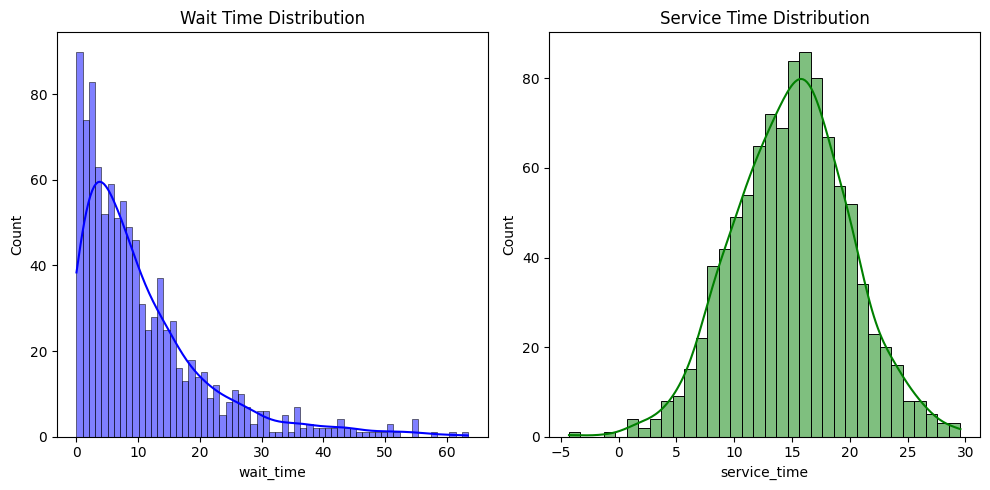

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is a pandas DataFrame containing our simulation data
df = pd.DataFrame({
    'wait_time': np.random.exponential(scale=10, size=1000),
    'service_time': np.random.normal(loc=15, scale=5, size=1000)
})

# Descriptive Statistics
print(df.describe())

# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['wait_time'], kde=True, color='blue', binwidth=1)
plt.title('Wait Time Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['service_time'], kde=True, color='green', binwidth=1)
plt.title('Service Time Distribution')

plt.tight_layout()
plt.show()


### Example - Analysis of Case Study 1: Hospital Emergency Department (ED)

Analyzing simulation outputs is crucial for understanding the performance of the modeled system and making informed decisions. For our Hospital Emergency Department (ED) case study, let's implement a framework to gather simulation data, visualize key metrics, and perform basic statistical analysis. This will help us evaluate the efficiency of the ED and identify areas for improvement.

#### Step 1: Gathering and Storing Simulation Data

To analyze the ED's performance, we need to collect data on patient wait times, treatment times, and resource utilization. We'll modify our SimPy model to store this information.

First, let's add data collection to our Hospital ED model:

In [27]:
import simpy
import random

# Parameters
NUM_DOCTORS = 3
NUM_BEDS = 5
TREATMENT_TIME_RANGE = (15, 60)  # Treatment time range in minutes
PATIENT_INTERARRIVAL_TIME = 10  # Average time between patient arrivals in minutes
SIMULATION_TIME = 24 * 60  # Simulate for 24 hours, time in minutes
BED_NEEDED_PROBABILITY = 0.5  # 50% chance a patient will need a bed

class HospitalED:
    def __init__(self, env):
        self.env = env
        self.doctor = simpy.Resource(env, NUM_DOCTORS)
        self.bed = simpy.Resource(env, NUM_BEDS)
        self.data = {"wait_times": [], "treatment_times": [], "bed_times": []}

    def treat_patient(self, patient):
        arrival_time = self.env.now
        needs_bed = random.random() < BED_NEEDED_PROBABILITY
        with self.doctor.request() as doctor_req:
            request_time = self.env.now
            yield doctor_req
            wait_time = self.env.now - request_time
            self.data["wait_times"].append(wait_time)
            
            # Treatment begins
            treatment_start_time = self.env.now
            treatment_duration = random.randint(*TREATMENT_TIME_RANGE)
            yield self.env.timeout(treatment_duration)
            self.data["treatment_times"].append(treatment_duration)
            
            if needs_bed:
                with self.bed.request() as bed_req:
                    bed_request_time = self.env.now
                    yield bed_req
                    bed_wait_time = self.env.now - bed_request_time
                    self.data["bed_times"].append(bed_wait_time)


In [28]:
def patient_arrivals(env, hospital):
    patient_id = 0
    while True:
        yield env.timeout(random.expovariate(1.0 / PATIENT_INTERARRIVAL_TIME))  # Next patient arrival
        patient_id += 1
        env.process(hospital.treat_patient(f"Patient {patient_id}"))

# Set up and run the simulation
env = simpy.Environment()
hospital = HospitalED(env)
env.process(patient_arrivals(env, hospital))
env.run(until=SIMULATION_TIME)

#### Step 2: Visualization Techniques
After running the simulation, we can visualize the collected data using Python's matplotlib library to understand patterns such as peak wait times or treatment delays.

Example visualization of wait times:

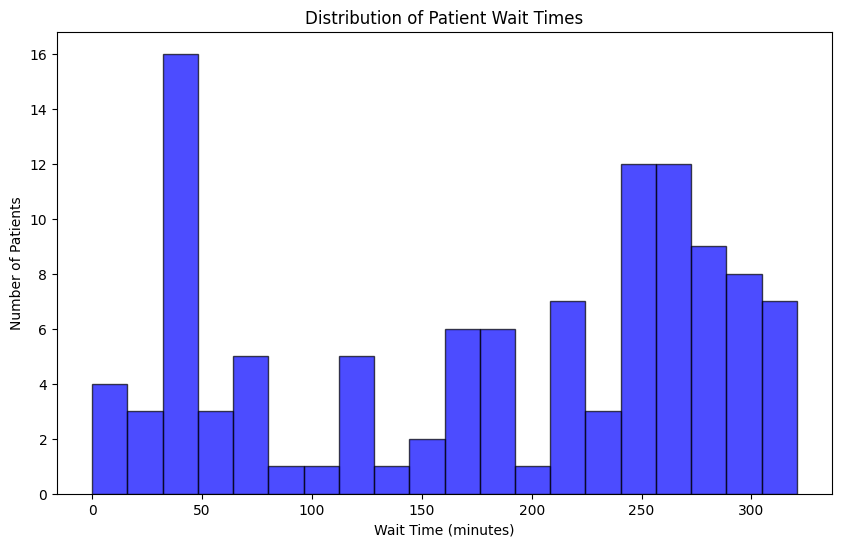

In [29]:
import matplotlib.pyplot as plt

def plot_wait_times(wait_times):
    plt.figure(figsize=(10, 6))
    plt.hist(wait_times, bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Distribution of Patient Wait Times')
    plt.xlabel('Wait Time (minutes)')
    plt.ylabel('Number of Patients')
    plt.show()

# Assuming the simulation has been run and data collected
plot_wait_times(hospital.data["wait_times"])


#### Step 3: Statistical Analysis for Decision-Making
Using the collected data, we can calculate key statistics such as average wait time, treatment time, and bed wait time. These metrics can inform decisions on resource allocation or process improvements.

Example calculation of average wait time:

In [30]:
def calculate_average_wait_time(wait_times):
    average_wait = sum(wait_times) / len(wait_times)
    return average_wait

average_wait_time = calculate_average_wait_time(hospital.data["wait_times"])
print(f"Average Patient Wait Time: {average_wait_time:.2f} minutes")


Average Patient Wait Time: 181.36 minutes


These steps form a basic framework for analyzing the performance of the Hospital ED simulation. By extending this framework, you can explore more complex questions, such as the impact of increasing the number of doctors or beds on patient wait times and overall ED throughput.

### Example - Analysis of Case Study 2: Distribution Network

For Case Study 2, the Distribution Network, let's implement an analysis to understand the dynamics of inventory levels, order fulfillment times, and the efficiency of the supply chain. We'll gather simulation data on these aspects, visualize them, and perform some basic statistical analysis to inform potential optimizations.

#### Step 1: Gathering and Storing Simulation Data

We need to extend our Distribution Network model to collect relevant data, such as inventory levels over time, order sizes, fulfillment times, and instances of backordering.

Here's an adjusted version of the Distribution Network class with data collection:

In [31]:
import simpy
import random

# Parameters
SUPPLY_RATE = 100  # Products supplied per time unit
ORDER_RATE = 5    # Average demand per time unit
WAREHOUSE_CAPACITY = 1000
SIMULATION_TIME = 100

class DistributionNetwork:
    def __init__(self, env):
        self.env = env
        self.warehouse = simpy.Container(env, WAREHOUSE_CAPACITY, init=500)
        self.supplier = env.process(self.supply_products())
        self.customer = env.process(self.customer_orders())
        self.data = {"inventory_levels": [], "fulfillment_times": [], "order_sizes": [], "backorders": []}

    def supply_products(self):
        while True:
            yield self.env.timeout(1)  # Simulate time taken to supply products
            supply_amount = SUPPLY_RATE
            yield self.warehouse.put(supply_amount)
            self.data["inventory_levels"].append((self.env.now, self.warehouse.level))

    def customer_orders(self):
        while True:
            yield self.env.timeout(random.expovariate(1/ORDER_RATE))
            order_size = random.randint(50, 150)  # Order size variability
            self.data["order_sizes"].append(order_size)
            order_time = self.env.now
            if self.warehouse.level < order_size:
                self.data["backorders"].append((order_time, order_size))
            yield self.warehouse.get(min(order_size, self.warehouse.level))
            fulfillment_time = self.env.now - order_time
            self.data["fulfillment_times"].append(fulfillment_time)
            self.data["inventory_levels"].append((self.env.now, self.warehouse.level))


In [34]:
# Setup and run the simulation
env = simpy.Environment()
distribution_network = DistributionNetwork(env)
env.run(until=SIMULATION_TIME)

#### Step 2: Visualization Techniques

Visualizing inventory levels and fulfillment times can help identify patterns, such as periods of stockout or inefficiencies in order processing.

Inventory Levels Over Time:

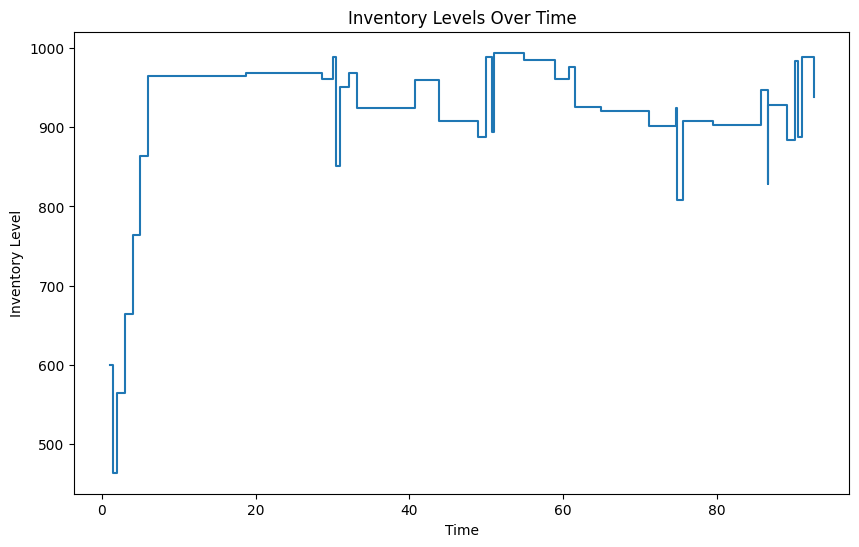

In [35]:
def plot_inventory_levels(inventory_levels):
    times, levels = zip(*inventory_levels)
    plt.figure(figsize=(10, 6))
    plt.step(times, levels, where='post')
    plt.title('Inventory Levels Over Time')
    plt.xlabel('Time')
    plt.ylabel('Inventory Level')
    plt.show()

plot_inventory_levels(distribution_network.data["inventory_levels"])


Order Fulfillment Times:

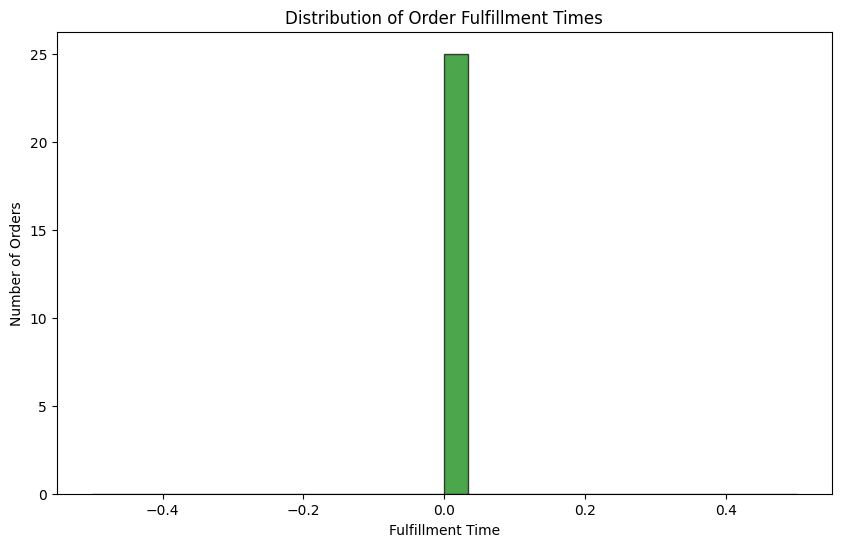

In [36]:
def plot_fulfillment_times(fulfillment_times):
    plt.figure(figsize=(10, 6))
    plt.hist(fulfillment_times, bins=30, alpha=0.7, color='green', edgecolor='black')
    plt.title('Distribution of Order Fulfillment Times')
    plt.xlabel('Fulfillment Time')
    plt.ylabel('Number of Orders')
    plt.show()

plot_fulfillment_times(distribution_network.data["fulfillment_times"])


#### Step 3: Statistical Analysis for Decision-Making
Calculating the average fulfillment time, frequency of backorders, and analyzing inventory level fluctuations can provide insights into the efficiency of the distribution network.


In [37]:
def calculate_average_fulfillment_time(fulfillment_times):
    average_time = sum(fulfillment_times) / len(fulfillment_times)
    return average_time

average_fulfillment_time = calculate_average_fulfillment_time(distribution_network.data["fulfillment_times"])
print(f"Average Order Fulfillment Time: {average_fulfillment_time:.2f} units")

def calculate_backorder_rate(backorders, order_sizes):
    total_orders = len(order_sizes)
    backorder_events = len(backorders)
    backorder_rate = (backorder_events / total_orders) * 100
    return backorder_rate

backorder_rate = calculate_backorder_rate(distribution_network.data["backorders"], distribution_network.data["order_sizes"])
print(f"Backorder Rate: {backorder_rate:.2f}%")


Average Order Fulfillment Time: 0.00 units
Backorder Rate: 0.00%


These analyses can help in understanding the critical points in the distribution network and guide decisions on inventory management, supply chain optimization, and customer satisfaction strategies.

### Example - Analysis of Case Study 3: Production Line

To analyze the outputs from our Case Study 3: Production Line simulation, we'll focus on key performance indicators (KPIs) such as throughput, production time, and resource utilization. These metrics will help us assess the efficiency of the production line and identify potential bottlenecks.

#### Gathering and Storing Simulation Data

We'll modify the ProductionLine class to record the start and completion times for each product. This data will allow us to calculate production times and throughput.

In [38]:
import simpy
import random

# Parameters
NUM_ASSEMBLY_WORKERS = 2
NUM_QC_WORKERS = 1
NUM_PACKAGING_WORKERS = 2
TIME_ASSEMBLY = 5  # Time it takes to assemble a product
TIME_QC = 3  # Time for quality control check
TIME_PACKAGING = 2  # Time to package a product
PRODUCTION_RATE = 2  # Time between starting production of each product
SIMULATION_TIME = 60  # Simulation time

class ProductionLine:
    def __init__(self, env):
        self.env = env
        self.assembly_workers = simpy.Resource(env, NUM_ASSEMBLY_WORKERS)
        self.qc_workers = simpy.Resource(env, NUM_QC_WORKERS)
        self.packaging_workers = simpy.Resource(env, NUM_PACKAGING_WORKERS)
        self.production_times = []  # Store production times for each product

    def process_product(self, product_id):
        start_time = self.env.now
        # Assembly
        with self.assembly_workers.request() as req:
            yield req
            yield self.env.timeout(TIME_ASSEMBLY)
        # Quality Control
        with self.qc_workers.request() as req:
            yield req
            yield self.env.timeout(TIME_QC)
        # Packaging
        with self.packaging_workers.request() as req:
            yield req
            yield self.env.timeout(TIME_PACKAGING)
        end_time = self.env.now
        self.production_times.append(end_time - start_time)  # Calculate total production time for this product

def production_sequence(env, production_line):
    product_id = 1
    while True:
        yield env.timeout(PRODUCTION_RATE)
        env.process(production_line.process_product(product_id))
        product_id += 1

# Setup and run the simulation
env = simpy.Environment()
production_line = ProductionLine(env)
env.process(production_sequence(env, production_line))
env.run(until=SIMULATION_TIME)


#### Analyzing Simulation Outputs

1. Calculate Key Performance Indicators
Let's calculate some KPIs such as average production time and throughput.

In [39]:
def calculate_kpis(production_times):
    average_production_time = sum(production_times) / len(production_times)
    throughput = len(production_times) / SIMULATION_TIME * 60  # Products per hour
    return average_production_time, throughput

average_production_time, throughput = calculate_kpis(production_line.production_times)
print(f"Average Production Time: {average_production_time:.2f} minutes")
print(f"Throughput: {throughput:.2f} products per hour")


Average Production Time: 17.50 minutes
Throughput: 16.00 products per hour


2. Visualization Techniques

Visualizing the distribution of production times can help identify variability and potential delays in the production process.

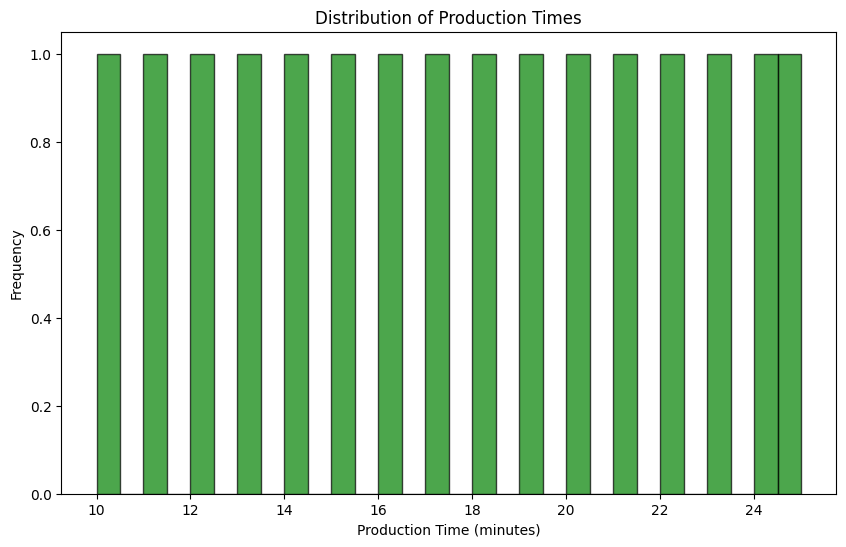

In [40]:
import matplotlib.pyplot as plt

def plot_production_times(production_times):
    plt.figure(figsize=(10, 6))
    plt.hist(production_times, bins=30, alpha=0.7, color='green', edgecolor='black')
    plt.title('Distribution of Production Times')
    plt.xlabel('Production Time (minutes)')
    plt.ylabel('Frequency')
    plt.show()

plot_production_times(production_line.production_times)


3. Statistical Analysis for Decision-Making

By analyzing the variability in production times, we can identify stages that might be causing delays. For example, if the production times are significantly longer than the sum of the time allocations for assembly, QC, and packaging, this could indicate excessive waiting due to resource constraints.

#### Next Steps

+ **Bottleneck Analysis**: Identify which stage (assembly, QC, or packaging) has the highest utilization and might be acting as a bottleneck.
+ **Resource Adjustment**: Simulate the impact of adding more workers to the bottlenecked stage to see if it improves throughput or reduces average production time.
+ **Process Improvement**: Explore changes to the production process, such as parallel processing where possible, to optimize the flow.

## Chapter 7: Optimizing System Performance with SimPy

Optimization in the context of system simulations involves finding the best configuration or parameters for a system to meet specified objectives, such as minimizing wait times, maximizing throughput, or balancing resource utilization. SimPy, being a versatile simulation framework, can be a powerful tool in conducting scenario analysis, sensitivity analysis, and applying optimization techniques to improve system performance. Here, we'll explore how these approaches can be applied using SimPy.

### Scenario Analysis

Scenario analysis involves simulating different configurations or operational strategies to understand their impact on system performance. It helps in evaluating "what-if" questions and comparing the outcomes of various scenarios.

**Example**: For the production line case study, scenarios might include changes in the number of workers at each stage, implementing shift patterns, or introducing automation. By simulating these scenarios, you can assess their impact on key performance indicators like production time and throughput.

**Solution**: For our production line case study, let's explore optimization through scenario analysis. We'll simulate different scenarios to evaluate their impact on key performance indicators (KPIs), specifically focusing on production time and throughput. This approach helps identify the most effective strategies to improve the production line's efficiency.

#### Scenario Analysis Framework

+ **Baseline Scenario**: Our original model with fixed numbers of workers at each stage.
+ **Increased Workers Scenario**: Adding more workers to a specific stage to see if it reduces overall production time and increases throughput.
+ **Shift Patterns Scenario**: Introducing shift patterns to simulate extended working hours without increasing the number of workers.
+ **Automation Scenario**: Implementing automation at a stage to reduce the production time required for that stage.

#### Implementing Scenarios in SimPy

We'll modify our SimPy model to accommodate these scenarios. For simplicity, we'll focus on the "Increased Workers Scenario" for the assembly stage as an example.


In [48]:
import simpy
import random

# Constants Definition
SIMULATION_TIME = 60  # Simulation time in minutes
TIME_ASSEMBLY = 5  # Time it takes to assemble a product
TIME_QC = 3  # Time for quality control check
TIME_PACKAGING = 2  # Time to package a product
PRODUCTION_RATE = 2  # Time between starting production of each product in minutes

# Scenario Parameters
SCENARIOS = {
    'baseline': {'assembly_workers': 2, 'qc_workers': 1, 'packaging_workers': 2},
    'increased_assembly_workers': {'assembly_workers': 4, 'qc_workers': 1, 'packaging_workers': 2},
    'increased_assembly_workers_2': {'assembly_workers': 1, 'qc_workers': 1, 'packaging_workers': 1},
    # Add other scenarios here as needed
}

class ProductionLine:
    def __init__(self, env, assembly_workers, qc_workers, packaging_workers):
        self.env = env
        self.assembly_workers = simpy.Resource(env, assembly_workers)
        self.qc_workers = simpy.Resource(env, qc_workers)
        self.packaging_workers = simpy.Resource(env, packaging_workers)
        self.production_times = []

    def process_product(self, product_id):
        start_time = self.env.now
        with self.assembly_workers.request() as req:
            yield req
            yield self.env.timeout(TIME_ASSEMBLY)
        with self.qc_workers.request() as req:
            yield req
            yield self.env.timeout(TIME_QC)
        with self.packaging_workers.request() as req:
            yield req
            yield self.env.timeout(TIME_PACKAGING)
        end_time = self.env.now
        self.production_times.append(end_time - start_time)

def production_sequence(env, production_line):
    product_id = 1
    while True:
        yield env.timeout(PRODUCTION_RATE)
        env.process(production_line.process_product(product_id))
        product_id += 1

def run_simulation(scenario_name, scenario_config):
    env = simpy.Environment()
    production_line = ProductionLine(env, **scenario_config)
    env.process(production_sequence(env, production_line))
    env.run(until=SIMULATION_TIME)
    return production_line.production_times

# Running Scenarios and Collecting Results
results = {}
for scenario_name, scenario_config in SCENARIOS.items():
    print(f"Running scenario: {scenario_name}")
    production_times = run_simulation(scenario_name, scenario_config)
    average_production_time = sum(production_times) / len(production_times) if production_times else 0
    throughput = len(production_times) / (SIMULATION_TIME / 60)  # Products per hour
    results[scenario_name] = (average_production_time, throughput)

# Displaying Results
for scenario_name, (avg_time, throughput) in results.items():
    print(f"{scenario_name}: Avg Production Time = {avg_time:.2f} min, Throughput = {throughput:.2f} products/hour")


Running scenario: baseline
Running scenario: increased_assembly_workers
Running scenario: increased_assembly_workers_2
baseline: Avg Production Time = 17.50 min, Throughput = 16.00 products/hour
increased_assembly_workers: Avg Production Time = 17.50 min, Throughput = 16.00 products/hour
increased_assembly_workers_2: Avg Production Time = 23.50 min, Throughput = 10.00 products/hour


#### Analyzing Scenario Outcomes

+ **Baseline vs. Increased Workers**: By comparing the average production time and throughput between the baseline and the increased assembly workers scenarios, you can assess the impact of adding more workers to the assembly stage.
+ **Further Exploration**: Similar methods can be applied to test other scenarios, like shift patterns and automation, by adjusting the relevant parameters and running the simulation.

This scenario analysis approach provides a systematic way to evaluate different strategies for optimizing the production line. It highlights the trade-offs and potential benefits of various operational changes, guiding decision-making towards the most effective improvements.

### Sensitivity Analysis

Sensitivity analysis examines how variation in input parameters affects the output of the simulation model. This analysis is crucial for identifying which parameters are most influential on system performance and understanding the system's robustness to variations in inputs.

**Example**: In the hospital ED case study, you might explore how changes in patient arrival rates or treatment times impact wait times and resource utilization. Sensitivity analysis can help identify thresholds beyond which the system becomes overwhelmed, guiding capacity planning and resource allocation decisions.


To conduct a sensitivity analysis on the Hospital Emergency Department (ED) case study, we will explore how varying patient arrival rates and treatment times impact key performance indicators (KPIs) like wait times and resource utilization. Sensitivity analysis allows us to understand the system's behavior under different conditions and identify critical thresholds that could inform capacity planning and resource allocation decisions.

#### Adjusting the Hospital ED Model for Sensitivity Analysis
We'll modify the Hospital ED model to make patient arrival rates and treatment times variable parameters. This flexibility allows us to systematically adjust these inputs and observe the outcomes.

In [59]:
import simpy
import random
import matplotlib.pyplot as plt

# Parameters for the base scenario
NUM_DOCTORS = 3
NUM_BEDS = 5
BED_NEEDED_PROBABILITY = 0.5
SIMULATION_TIME = 480  # Simulate for 8 hours, assuming time units are in minutes

class HospitalED:
    def __init__(self, env, treatment_time_mean, patient_interarrival_time):
        self.env = env
        self.doctor = simpy.Resource(env, NUM_DOCTORS)
        self.bed = simpy.Resource(env, NUM_BEDS)
        self.treatment_time_mean = treatment_time_mean
        self.patient_interarrival_time = patient_interarrival_time
        self.wait_times = []
    
    def patient(self, name):
        arrival_time = self.env.now
        needs_bed = random.random() < BED_NEEDED_PROBABILITY
        with self.doctor.request() as req:
            yield req
            wait_time = self.env.now - arrival_time
            self.wait_times.append(wait_time)
            treatment_duration = random.expovariate(1.0 / self.treatment_time_mean)
            yield self.env.timeout(treatment_duration)
            if needs_bed:
                with self.bed.request() as bed_req:
                    yield bed_req
                    yield self.env.timeout(treatment_duration)

def patient_arrivals(env, hospital):
    patient_id = 0
    while True:
        yield env.timeout(random.expovariate(1.0 / hospital.patient_interarrival_time))
        patient_id += 1
        env.process(hospital.patient(f"Patient {patient_id}"))

def run_simulation(treatment_time_mean, patient_interarrival_time, simulation_time=SIMULATION_TIME):
    env = simpy.Environment()
    hospital = HospitalED(env, treatment_time_mean, patient_interarrival_time)
    env.process(patient_arrivals(env, hospital))
    env.run(until=simulation_time)
    return hospital.wait_times

# Sensitivity Analysis Variables
treatment_time_means = [10, 15, 20]  # Mean treatment times in minutes
patient_interarrival_times = [5, 10, 15]  # Mean patient interarrival times in minutes

# Run simulations across different scenarios

# Initialize a dictionary to hold the results
# Structure: {treatment_time_mean: {patient_interarrival_time: avg_wait_time}}
avg_wait_times = {treatment_time_mean: {} for treatment_time_mean in treatment_time_means}

# Modified section for running simulations and collecting data
for treatment_time_mean in treatment_time_means:
    for patient_interarrival_time in patient_interarrival_times:
        wait_times = run_simulation(treatment_time_mean, patient_interarrival_time)
        avg_wait_time = sum(wait_times) / len(wait_times) if wait_times else 0
        avg_wait_times[treatment_time_mean][patient_interarrival_time] = avg_wait_time
        print(f"Treatment mean: {treatment_time_mean} mins, Interarrival mean: {patient_interarrival_time} mins, Average wait time: {avg_wait_time:.2f} mins")



Treatment mean: 10 mins, Interarrival mean: 5 mins, Average wait time: 26.60 mins
Treatment mean: 10 mins, Interarrival mean: 10 mins, Average wait time: 0.88 mins
Treatment mean: 10 mins, Interarrival mean: 15 mins, Average wait time: 1.23 mins
Treatment mean: 15 mins, Interarrival mean: 5 mins, Average wait time: 75.17 mins
Treatment mean: 15 mins, Interarrival mean: 10 mins, Average wait time: 1.68 mins
Treatment mean: 15 mins, Interarrival mean: 15 mins, Average wait time: 1.23 mins
Treatment mean: 20 mins, Interarrival mean: 5 mins, Average wait time: 82.37 mins
Treatment mean: 20 mins, Interarrival mean: 10 mins, Average wait time: 20.65 mins
Treatment mean: 20 mins, Interarrival mean: 15 mins, Average wait time: 10.53 mins


#### Interpreting Results
By running this simulation across a range of treatment time means and patient interarrival times, we can observe how variations in these parameters affect the average wait time for patients. This analysis helps identify critical points at which the ED's capacity is strained, indicating a need for additional resources or process improvements.

#### Visualizing Sensitivity Analysis Results
To better visualize the impact of these parameters, you could plot the average wait times across different scenarios using matplotlib. Here's a simple example to get you started:

In [60]:
def plot_sensitivity_analysis(patient_interarrival_times, treatment_time_means, avg_wait_times):
    plt.figure(figsize=(10, 6))
    for treatment_time_mean, interarrival_times_to_wait in avg_wait_times.items():
        # Extracting avg wait times in the order of patient_interarrival_times
        wait_times_ordered = [interarrival_times_to_wait[interarrival] for interarrival in patient_interarrival_times]
        plt.plot(patient_interarrival_times, wait_times_ordered, marker='o', label=f'Treatment Time {treatment_time_mean} mins')
    
    plt.xlabel('Patient Interarrival Time (mins)')
    plt.ylabel('Average Wait Time (mins)')
    plt.title('Sensitivity Analysis of Patient Wait Times')
    plt.xticks(patient_interarrival_times)
    plt.legend()
    plt.grid(True)
    plt.show()


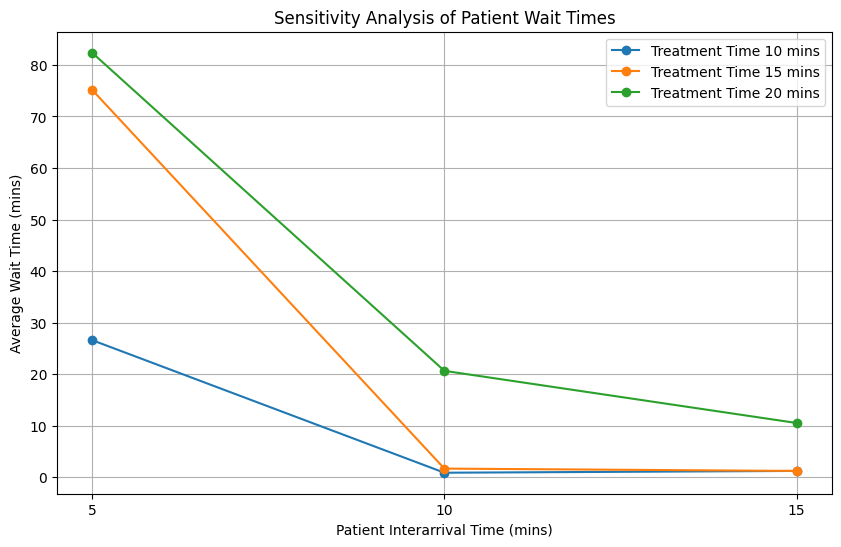

In [61]:
plot_sensitivity_analysis(patient_interarrival_times, treatment_time_means, avg_wait_times)


### Optimization Techniques

Optimization techniques involve systematically searching for the best parameter settings or configurations to achieve specific objectives. This can range from simple trial-and-error approaches to more sophisticated optimization algorithms.

#### Implementing Optimization with SimPy

1. Define the Objective Function: The first step is to clearly define what you're trying to optimize (e.g., minimize average wait times in the ED). This involves creating a function that calculates the metric of interest from the simulation outputs.

2. Parameter Space Exploration: Next, systematically vary the parameters of interest (e.g., number of doctors, beds) to understand their impact on the objective. This can be done through grid search, random search, or more sophisticated algorithms.

3. Use of External Libraries: For more complex optimization problems, you might integrate SimPy with libraries like scipy.optimize, pyomo, or DEAP for genetic algorithms. These libraries can help automate the search for optimal solutions.

4. Iterative Refinement: Optimization is often an iterative process. Initial findings may lead to adjustments in the simulation model or the exploration of new scenarios based on insights gained.


**Example**: Using the distribution network case study, you could aim to minimize shipping costs and delivery times. This might involve optimizing inventory levels, warehouse locations, or routing strategies. Techniques such as genetic algorithms, linear programming, or simulation-based optimization can be employed, possibly integrated with external optimization libraries or tools due to SimPy's focus on simulation rather than optimization.


Implementing optimization for a distribution network, where the goal is to minimize shipping costs and delivery times, involves a multi-faceted approach. Given SimPy's simulation capabilities, optimization often requires integrating external libraries designed for optimization tasks. Here, we'll outline a strategy to approach this problem, focusing on optimizing inventory levels as an example. We'll use Python's scipy.optimize for a simple optimization routine.

####  Step 1: Define the Problem within the SimPy Framework
First, we need a simplified version of our distribution network simulation that tracks shipping costs and delivery times. We'll focus on a single aspect—optimizing inventory levels to minimize shipping costs under varying demand scenarios.

In [65]:
import simpy
import random
import numpy as np
from scipy.optimize import minimize

# Parameters
SIMULATION_TIME = 30
ORDER_RATE = 0.1  # Average demand per time unit
SHIPMENT_COST_PER_UNIT = 5  # Cost to ship a single unit
STORAGE_COST_PER_UNIT = 0.1  # Cost to store a single unit per time unit
INITIAL_INVENTORY = 100
REORDER_POINT = 50
REORDER_AMOUNT = 100

# Simulation of the Distribution Network
def distribution_network_simulation(reorder_point, reorder_amount, order_rate, simulation_time):
    """Simulate the distribution network, returning the total cost."""
    env = simpy.Environment()
    inventory = INITIAL_INVENTORY
    total_cost = 0

    def order_process(env):
        nonlocal inventory, total_cost
        while True:
            yield env.timeout(random.expovariate(order_rate))
            order_size = random.randint(1, 10)  # Example order size
            inventory -= order_size
            if inventory < reorder_point:
                inventory += reorder_amount
                total_cost += reorder_amount * SHIPMENT_COST_PER_UNIT

    def storage_cost_process(env):
        nonlocal inventory, total_cost
        while True:
            yield env.timeout(1)  # Check storage cost at each time unit
            total_cost += inventory * STORAGE_COST_PER_UNIT

    env.process(order_process(env))
    env.process(storage_cost_process(env))
    env.run(until=simulation_time)

    return total_cost

# Objective Function to Minimize
def objective_function(x):
    reorder_point, reorder_amount = x
    total_cost = distribution_network_simulation(reorder_point, reorder_amount, ORDER_RATE, SIMULATION_TIME)
    return total_cost



#### Step 2: Apply Optimization Technique

We'll use scipy.optimize.minimize to find the optimal reorder point and reorder amount that minimize the total cost. Since this is a demonstration, we'll keep the model and optimization problem relatively simple.

In [66]:
from scipy.optimize import minimize

# Initial Guess
x0 = [50, 100]  # Initial guess for reorder point and reorder amount

# Bounds to ensure reorder point and reorder amount are positive
bounds = [(0, None), (0, None)]

# Run the optimization
result = minimize(objective_function, x0, method='TNC', bounds=bounds)

if result.success:
    optimal_reorder_point, optimal_reorder_amount = result.x
    print(f"Optimal Reorder Point: {optimal_reorder_point:.2f}, Optimal Reorder Amount: {optimal_reorder_amount:.2f}")
else:
    print("Optimization was unsuccessful. Please check the objective function and constraints.")



Optimal Reorder Point: 50.00, Optimal Reorder Amount: 100.00


#### Integration with External Libraries for More Complex Scenarios

For more complex scenarios involving warehouse locations or routing strategies, you might explore:

+ Genetic Algorithms: Useful for problems with many local optima, such as routing. Python libraries like DEAP can be used.
+ Linear Programming: For problems that can be formulated linearly, such as inventory levels or allocation problems. Libraries like PuLP are suitable.
+ Simulation-Based Optimization: Where the simulation itself forms part of the objective function or constraints, necessitating iterative simulation runs.

#### Note on Implementation
The example provided focuses on a conceptual framework for integrating SimPy simulations with optimization techniques. Actual implementation details, especially for complex scenarios, require a thorough understanding of both the problem domain and the optimization methods being applied. For real-world applications, consider each decision variable's impact, constraints, and the computational complexity of the optimization.

If you have a specific scenario or a more detailed problem statement in mind, let me know! This way, we can tailor the approach more closely to your needs.


**Example**: Suppose we want to minimize patient wait times in the hospital ED by optimizing the number of doctors. An iterative approach might involve running the simulation across a range of doctor counts, measuring the impact on average wait times, and identifying the optimal count within given constraints (e.g., budget).

To implement the optimization example for minimizing patient wait times in the hospital Emergency Department (ED) by finding the optimal number of doctors, we'll follow an iterative approach. We will run the simulation across a range of doctor counts, measure the impact on average wait times, and identify the optimal doctor count given certain constraints such as budget limits or physical space.

#### Step 1: Define the Simulation

First, let's define a function that simulates the hospital ED for a given number of doctors and calculates the average patient wait time:


In [67]:
import simpy
import random
import numpy as np

# Parameters
NUM_BEDS = 5
TREATMENT_TIME_MEAN = 20
PATIENT_INTERARRIVAL_TIME = 10  # Average time between patient arrivals in minutes
SIMULATION_TIME = 480  # Simulate for 8 hours, time in minutes

def simulate_hospital_ed(num_doctors):
    env = simpy.Environment()
    doctor = simpy.Resource(env, num_doctors)
    bed = simpy.Resource(env, NUM_BEDS)
    wait_times = []
    
    def patient(env):
        arrival_time = env.now
        with doctor.request() as req:
            yield req
            wait_time = env.now - arrival_time
            wait_times.append(wait_time)
            yield env.timeout(random.expovariate(1.0 / TREATMENT_TIME_MEAN))
            if random.random() < 0.5:  # Assume 50% of patients need a bed
                with bed.request() as bed_req:
                    yield bed_req
                    yield env.timeout(random.expovariate(1.0 / TREATMENT_TIME_MEAN))
    
    def patient_arrivals(env):
        while True:
            yield env.timeout(random.expovariate(1.0 / PATIENT_INTERARRIVAL_TIME))
            env.process(patient(env))
    
    env.process(patient_arrivals(env))
    env.run(until=SIMULATION_TIME)
    
    return np.mean(wait_times) if wait_times else float('inf')


#### Step 2: Iterative Optimization

Now, let's iterate over a range of doctor counts to find the optimal number that minimizes the average patient wait time. We'll consider a realistic range based on the hospital's capacity and budget constraints.

In [68]:
# Range of doctor counts to explore
doctor_counts = range(1, 11)  # From 1 to 10 doctors

# Track the best configuration
best_average_wait_time = float('inf')
best_num_doctors = 0

# Iterate over possible number of doctors
for num_doctors in doctor_counts:
    average_wait_time = simulate_hospital_ed(num_doctors)
    print(f"Number of doctors: {num_doctors}, Average wait time: {average_wait_time:.2f} minutes")
    
    if average_wait_time < best_average_wait_time:
        best_average_wait_time = average_wait_time
        best_num_doctors = num_doctors

print(f"\nOptimal number of doctors: {best_num_doctors} with an average wait time of {best_average_wait_time:.2f} minutes")


Number of doctors: 1, Average wait time: 125.09 minutes
Number of doctors: 2, Average wait time: 95.23 minutes
Number of doctors: 3, Average wait time: 14.62 minutes
Number of doctors: 4, Average wait time: 23.93 minutes
Number of doctors: 5, Average wait time: 0.62 minutes
Number of doctors: 6, Average wait time: 0.41 minutes
Number of doctors: 7, Average wait time: 0.00 minutes
Number of doctors: 8, Average wait time: 0.00 minutes
Number of doctors: 9, Average wait time: 0.00 minutes
Number of doctors: 10, Average wait time: 0.00 minutes

Optimal number of doctors: 7 with an average wait time of 0.00 minutes


#### Analysis

This approach runs the simulation for different numbers of doctors and identifies the configuration that results in the lowest average wait time for patients. It provides a straightforward way to evaluate how increasing or decreasing staff affects patient wait times, which is crucial for planning and budgeting purposes.

Keep in mind, this simple optimization does not consider other potentially important factors such as varying patient arrival rates throughout the day, the severity of conditions, and the impact on treatment quality or staff well-being. Incorporating these factors would require a more complex model and potentially more advanced optimization techniques.

This iterative optimization method offers a practical way to make data-driven decisions to improve hospital ED efficiency within given constraints.


### Conclusion
Optimizing system performance using SimPy requires a clear understanding of the system's dynamics, the objectives to be achieved, and the parameters that can be adjusted. By combining SimPy's simulation capabilities with scenario analysis, sensitivity analysis, and optimization techniques, you can make informed decisions to improve system efficiency and effectiveness.

## Chapter 8: Integrating SimPy with Other Python Libraries

Integrating SimPy with other Python libraries can significantly enhance the capabilities of your simulations. Libraries such as pandas for data analysis, matplotlib and seaborn for visualization, and scikit-learn for machine learning can be used to analyze and interpret simulation outputs, improve visual communication of results, and even incorporate predictive modeling into your simulations. Here’s how you can leverage these libraries in conjunction with SimPy.

### Data Analysis with Pandas

Pandas is an essential tool for data analysis and manipulation. You can use pandas to structure your simulation outputs into DataFrame objects, making it easier to analyze and manipulate the data.

#### Example: Storing and analyzing hospital ED simulation data with pandas.

In [72]:
import simpy
import random
import pandas as pd

# Simulation parameters
NUM_BEDS = 5
TREATMENT_TIME_MEAN = 20
PATIENT_INTERARRIVAL_TIME = 10  # Average time between patient arrivals in minutes
SIMULATION_TIME = 480  # Simulate for 8 hours, time in minutes

def simulate_hospital_ed(num_doctors, patient_interarrival_time, treatment_time_mean, simulation_time):
    """Simulate the hospital ED for a given number of doctors, returning the collected data."""
    env = simpy.Environment()
    doctor = simpy.Resource(env, num_doctors)
    bed = simpy.Resource(env, NUM_BEDS)
    data = []  # List to collect data
    
    def patient(env, patient_id):
        arrival_time = env.now
        with doctor.request() as req:
            yield req
            wait_time = env.now - arrival_time
            treatment_duration = random.expovariate(1.0 / treatment_time_mean)
            yield env.timeout(treatment_duration)
            if random.random() < 0.5:  # Assume 50% of patients need a bed
                with bed.request() as bed_req:
                    yield bed_req
                    yield env.timeout(treatment_duration)
        data.append((patient_id, num_doctors, wait_time))
    
    def patient_arrivals(env):
        patient_id = 1
        while True:
            yield env.timeout(random.expovariate(1.0 / patient_interarrival_time))
            env.process(patient(env, patient_id))
            patient_id += 1
    
    env.process(patient_arrivals(env))
    env.run(until=simulation_time)
    
    return data

# Collect data from simulation runs with different numbers of doctors
all_data = []
for num_doctors in range(1, 6):  # Varying the number of doctors from 1 to 5
    sim_data = simulate_hospital_ed(num_doctors, PATIENT_INTERARRIVAL_TIME, TREATMENT_TIME_MEAN, SIMULATION_TIME)
    all_data.extend(sim_data)

# Convert collected data to a pandas DataFrame
df = pd.DataFrame(all_data, columns=['PatientID', 'NumDoctors', 'WaitTime'])


In [73]:
average_wait_times = df.groupby('NumDoctors')['WaitTime'].mean().reset_index()
print(average_wait_times)


   NumDoctors   WaitTime
0           1  99.886418
1           2  59.634615
2           3   7.266762
3           4   2.400843
4           5   0.000000


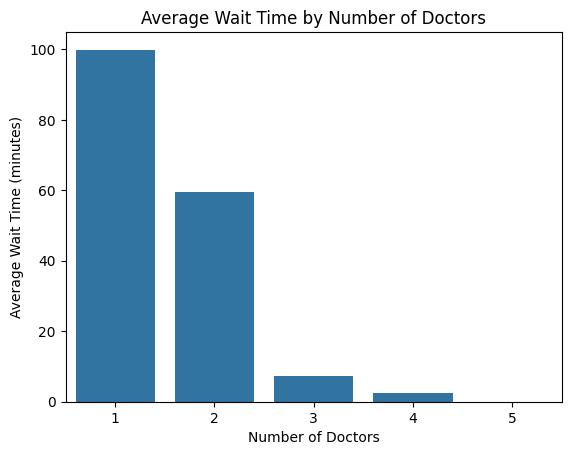

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=average_wait_times, x='NumDoctors', y='WaitTime')
plt.title('Average Wait Time by Number of Doctors')
plt.xlabel('Number of Doctors')
plt.ylabel('Average Wait Time (minutes)')
plt.show()


### Machine Learning for Predictive Modeling with Scikit-Learn

Scikit-learn is a machine learning library that provides simple and efficient tools for data mining and data analysis. It can be used to build predictive models based on your simulation data.

#### Example: Predicting average wait times based on the number of doctors using linear regression.

In [77]:
def collect_simulation_data(num_doctors_list, patient_interarrival_time, treatment_time_mean, simulation_time):
    simulation_results = []

    for num_doctors in num_doctors_list:
        sim_data = simulate_hospital_ed(num_doctors, patient_interarrival_time, treatment_time_mean, simulation_time)
        df = pd.DataFrame(sim_data, columns=['PatientID', 'NumDoctors', 'WaitTime'])
        avg_wait_time = df['WaitTime'].mean()
        simulation_results.append((num_doctors, avg_wait_time))

    return pd.DataFrame(simulation_results, columns=['NumDoctors', 'AverageWaitTime'])

# Define a range of doctor counts to simulate
num_doctors_list = range(1, 11)  # 1 to 10 doctors

# Collect simulation data
df = collect_simulation_data(num_doctors_list, PATIENT_INTERARRIVAL_TIME, TREATMENT_TIME_MEAN, SIMULATION_TIME)



Now, we'll use the collected data to build a simple linear regression model to predict average wait times based on the number of doctors:

Mean Absolute Error: 36.19 minutes


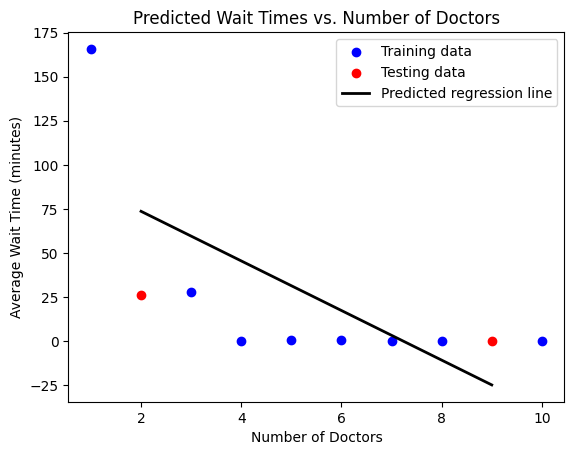

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Prepare the data
X = df[['NumDoctors']]  # Feature: Number of doctors
y = df['AverageWaitTime']  # Target: Average wait time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} minutes")

# Optional: Visualize the model
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Predicted regression line')
plt.title('Predicted Wait Times vs. Number of Doctors')
plt.xlabel('Number of Doctors')
plt.ylabel('Average Wait Time (minutes)')
plt.legend()
plt.show()


This predictive model uses the data generated from the simulations to learn the relationship between the number of doctors and the average wait time in the hospital ED. By evaluating the model with the testing set, we can assess its accuracy and apply it to make predictions under new scenarios or configurations.

By integrating SimPy simulations with machine learning techniques, we can not only analyze and understand current system performance but also predict future outcomes and make informed decisions to optimize system operations.

### Conclusion

Integrating SimPy with pandas, matplotlib, seaborn, and scikit-learn enhances the analysis, visualization, and predictive modeling capabilities of your simulations. This approach not only helps in understanding and optimizing complex systems but also in communicating results effectively and making data-driven decisions.

# Uso de `yield` en SimPy

In [79]:
def tst_yield():
    i = 0

    while i < 10:
        yield i
        i += 1

In [82]:
for n in tst_yield():
    print(n)

0
1
2
3
4
5
6
7
8
9


En SimPy, `yield` se utiliza principalmente para modelar el paso del tiempo y la interacción con recursos en simulaciones de eventos discretos. Al usar `yield` dentro de un proceso de SimPy, le indicas a la simulación que espere por algún evento, como el avance del tiempo, la disponibilidad de un recurso o la finalización de otro proceso. Este enfoque permite simular complejas interacciones y dependencias temporales entre diferentes entidades en un sistema.

### Uso Básico de yield con SimPy

#### Esperar un Periodo de Tiempo

Uno de los usos más comunes de `yield` es pausar la ejecución de un proceso por un tiempo determinado. Esto se hace a través de `env.timeout(tiempo)`, donde env es el entorno de simulación de SimPy y tiempo es el tiempo de espera.

In [83]:
import simpy

def mi_proceso(env):
    print('Inicio:', env.now)
    yield env.timeout(5)  # Esperar 5 unidades de tiempo
    print('Fin:', env.now)

env = simpy.Environment()
env.process(mi_proceso(env))
env.run()


Inicio: 0
Fin: 5


En este ejemplo, el proceso `mi_proceso` imprime el momento actual de la simulación, espera 5 unidades de tiempo y luego imprime el nuevo momento de la simulación. Usando `yield` con `env.timeout()`, el proceso se pausa, permitiendo que otros procesos (si los hubiera) avancen.

#### Interactuando con Recursos

SimPy también permite modelar la interacción con recursos limitados (como máquinas en una fábrica, cajeros en un banco, etc.) utilizando `yield`. Esto se hace generalmente con instrucciones como `yield resource.request()` para solicitar acceso a un recurso y `yield resource.release()` para liberarlo, aunque la liberación a menudo se maneja automáticamente usando el manejador de contexto `with`.

In [84]:
def proceso_con_recurso(env, recurso):
    print('Proceso iniciado:', env.now)
    with recurso.request() as req:  # Solicitar el recurso
        yield req  # Esperar hasta que el recurso esté disponible
        print('Recurso obtenido:', env.now)
        yield env.timeout(3)  # Simular trabajo durante 3 unidades de tiempo
    print('Recurso liberado:', env.now)  # El recurso se libera al salir del bloque 'with'

env = simpy.Environment()
recurso = simpy.Resource(env, capacity=1)
env.process(proceso_con_recurso(env, recurso))
env.run()


Proceso iniciado: 0
Recurso obtenido: 0
Recurso liberado: 3


Aquí, `proceso_con_recurso` intenta obtener un recurso antes de realizar un trabajo que dura 3 unidades de tiempo. El uso de `with recurso.request() as req:` gestiona automáticamente la solicitud y liberación del recurso.

#### Eventos Personalizados y Condiciones Complejas

Además de esperar tiempos y recursos, `yield` puede usarse para esperar por eventos personalizados o condiciones más complejas. Por ejemplo, puedes esperar a que varios procesos se completen usando `yield env.all_of([evento1, evento2, ...])` o esperar hasta que el primero de varios eventos ocurra con `yield env.any_of([evento1, evento2, ...])`.

#### Conclusión

El uso de `yield` en SimPy es fundamental para crear simulaciones de eventos discretos, permitiendo modelar comportamientos y procesos temporales complejos de manera intuitiva y eficiente. Al pausar y reanudar procesos, SimPy facilita la representación de sistemas dinámicos y sus interacciones a lo largo del tiempo, desde simples esperas hasta interacciones complejas entre múltiples entidades y recursos.